In [1]:
import numpy as np   
import pandas as pd    
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
import os
%matplotlib inline

In [2]:
path = os.path.abspath(os.path.join(os.path.dirname('EDA.ipynb'), '..', 'Parsing\\dataframes'))

In [3]:
df = pd.read_csv(path +'\\merged_df.csv')
df = df[df['Qty'] > 0]

D:\Python\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169854 entries, 0 to 576809
Data columns (total 81 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Language                169854 non-null  object 
 1   Set                     169854 non-null  object 
 2   Foil                    169854 non-null  int64  
 3   Quality                 169854 non-null  object 
 4   Rarity                  169854 non-null  object 
 5   Price                   169854 non-null  int64  
 6   Qty                     169854 non-null  int64  
 7   Name                    169854 non-null  object 
 8   Type                    169854 non-null  object 
 9   Illustrator             168161 non-null  object 
 10  Standard                169854 non-null  object 
 11  Alchemy                 169854 non-null  object 
 12  Pioneer                 169854 non-null  object 
 13  Explorer                169854 non-null  object 
 14  Modern              

In [5]:
# Смотрим распределение для небинарных фич
nonbin_col = []
for col in df.columns.tolist():
    if df[col].nunique() > 2:
        nonbin_col.append(col)

In [6]:
df[nonbin_col].describe()

,Price,Qty,Cost_qty,Feature length,Month,Year,Month_cos,Features cost,Color cost,Total abilities qty,Abilities only qty,Action only qty
count,169854.000000,169854.000000,169854.000000,169854.000000,169854.000000,169854.000000,1.698540e+05,169854.000000,169854.000000,169854.000000,169854.000000,169854.000000
mean,77.407909,4.190475,1.370436,60.769408,7.027918,2014.084885,-1.119558e-01,1.545239,1.707060,0.458040,0.144583,0.313328
std,300.162081,5.206543,1.921576,73.192179,2.930212,6.078722,6.648884e-01,1.491977,2.801975,0.929635,0.450811,0.716923
min,7.000000,1.000000,0.000000,0.000000,1.000000,1994.000000,-1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,1.000000,0.000000,15.000000,5.000000,2010.000000,-8.660254e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,2.000000,0.000000,15.000000,7.000000,2016.000000,-1.836970e-16,2.000000,0.000000,0.000000,0.000000,0.000000
75%,65.000000,5.000000,3.000000,93.000000,10.000000,2019.000000,5.000000e-01,2.000000,3.000000,1.000000,0.000000,0.000000
max,33020.000000,72.000000,15.000000,645.000000,12.000000,2022.000000,1.000000e+00,102.000000,25.000000,14.000000,13.000000,6.000000


Text(0.5, 1.0, 'Распределение цены')

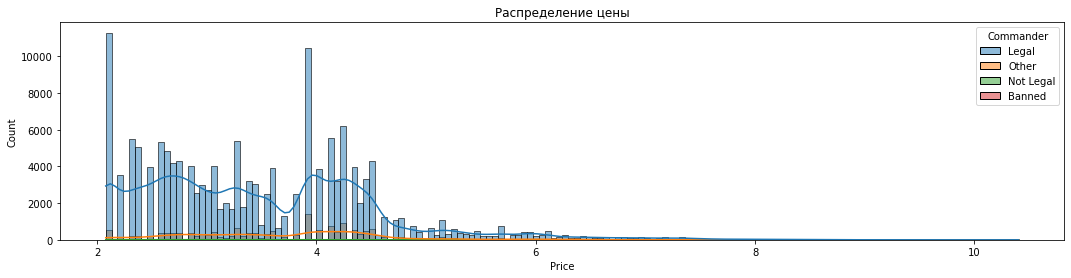

In [7]:
plt.figure(figsize=(18, 4))
sns.histplot(df, x = np.log1p(df['Price']), kde = True, hue = 'Commander')
plt.title('Распределение цены')

Большие хвосты, надо подрезать выбросы

In [8]:
len(df)

169854

In [9]:
# Подбираем порог адекватной цены, стараемся выкинуть поменьше строк
print(round(len(df[(df['Price'] < 5) | (df['Price'] > 1000)]) / len(df), 3))
df = df[(df['Price'] > 5) & (df['Price'] < 1001)].reset_index(drop=True)

0.01


In [10]:
std_skew = skew(df['Price'])
log_skew = skew(np.log1p(df['Price']))
boxcox_skew = skew(stats.boxcox(df['Price'])[0])
print(std_skew, log_skew, boxcox_skew)

5.103615031053878 0.6107826425677428 0.05579562855425321


In [11]:
df['Price'], lmbda = stats.boxcox(df['Price'])

Text(0.5, 1.0, 'Количество лотов по типу карты')

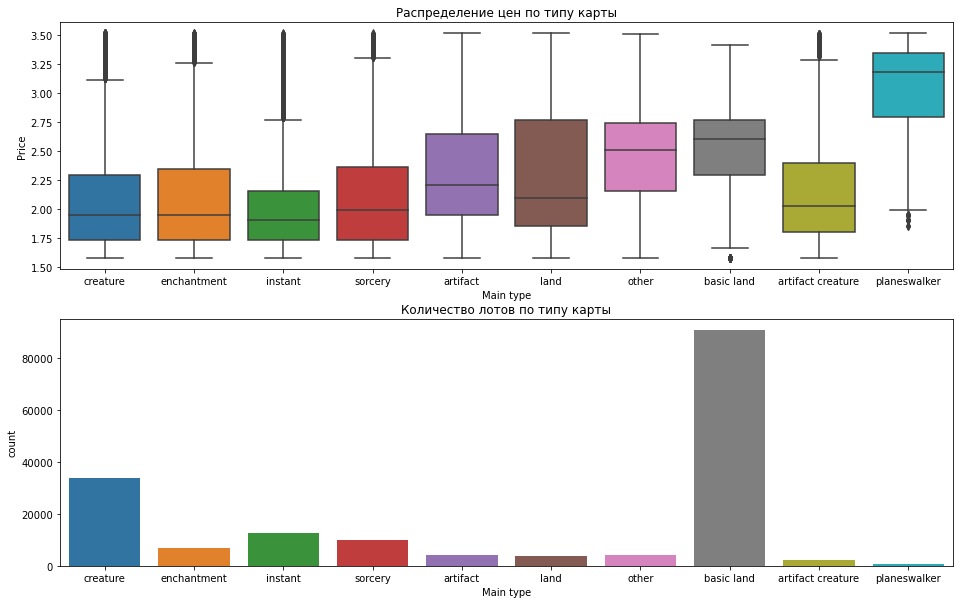

In [12]:
f, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 10))
sns.boxplot(x = df['Main type'], y = df['Price'], ax = ax1)
ax1.set_title('Распределение цен по типу карты')
sns.countplot(x = df['Main type'], ax = ax2)
ax2.set_title('Количество лотов по типу карты')

При том, что basic land занимают более половины всех лотов, у них нет никаких критериев функциональности. Только состояние и визуальная составляющая. Таблицу необходимо разделить.

Skewness: 0.05579562855425321 
Kurtosis: -0.7911588495326622


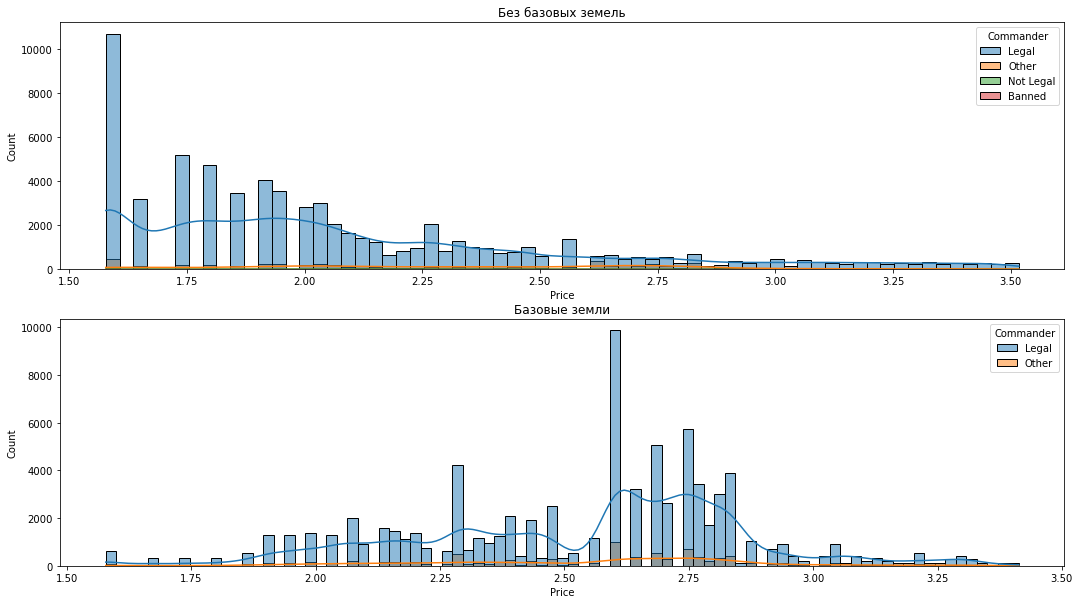

In [13]:
f, (ax1, ax2) = plt.subplots(nrows=2, figsize=(18, 10))
bcskew = skew(df['Price'])
bckurtosis = kurtosis(df['Price'])
sns.histplot(data = df[(df['Main type'] != 'basic land') ], x = 'Price', kde = 'True', hue = 'Commander', ax = ax1) 
ax1.set_title('Без базовых земель')
sns.histplot(data = df[(df['Main type'] == 'basic land') ], x = 'Price', kde = 'True', hue = 'Commander', ax = ax2)
ax2.set_title('Базовые земли')
print(f'Skewness: {bcskew} \nKurtosis: {bckurtosis}')

basic lands похожи на нормальное распределение, в то время, как другая часть данных похожа на геометрическое

Text(0.5, 1.0, 'Распределение цены от состояния и редкости')

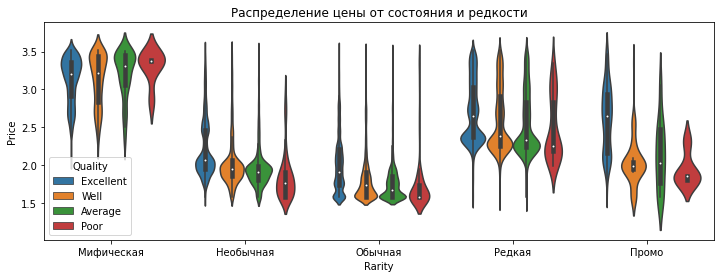

In [14]:
plt.figure(figsize=(12,4))
sns.violinplot(x='Rarity', y='Price', data=df[df['Main type'] != 'basic land'], hue = 'Quality')
plt.title('Распределение цены от состояния и редкости')

Выше редкость - дороже карта. Выше качество - дороже карта (кроме мифических)

In [15]:
print('Распределение карт по редкости\n',
      df['Rarity'].value_counts(normalize=True).reset_index(), 
      '\nРаспределение карт по редкости без земель\n',
      df[df['Main type'] != 'basic land']['Rarity'].value_counts(normalize=True).reset_index())

Распределение карт по редкости
         index    Rarity
0     Обычная  0.780884
1   Необычная  0.137401
2      Редкая  0.068938
3  Мифическая  0.009416
4       Промо  0.003361 
Распределение карт по редкости без земель
         index    Rarity
0     Обычная  0.528501
1   Необычная  0.297504
2      Редкая  0.149267
3  Мифическая  0.020387
4       Промо  0.004340


Basic lands вносят шум только в обычные карты, но земель большинство

<Figure size 1296x576 with 0 Axes>

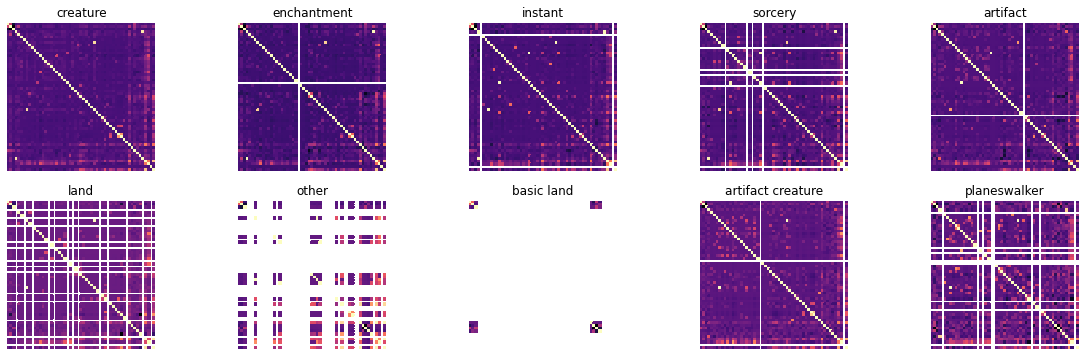

In [16]:
plt.figure(figsize=(18,8))
f, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 6))
ax_1 = 0
ax_x = 0
ax_y = 0
for m_type in df['Main type'].unique():
    sns.heatmap(df[df['Main type'] == m_type].corr(), cmap = 'magma', square=True, ax =ax[(ax_x,ax_y)], cbar = False, xticklabels=False, yticklabels=False)
    ax[(ax_x,ax_y)].set_title(m_type)
    ax_1 += 1
    ax_x = ax_1 // 5
    ax_y = ax_1 % 5

Помимо basic land и other, типы имеют схожую корреляционную матрицу, поэтому их можно рассматривать вместе

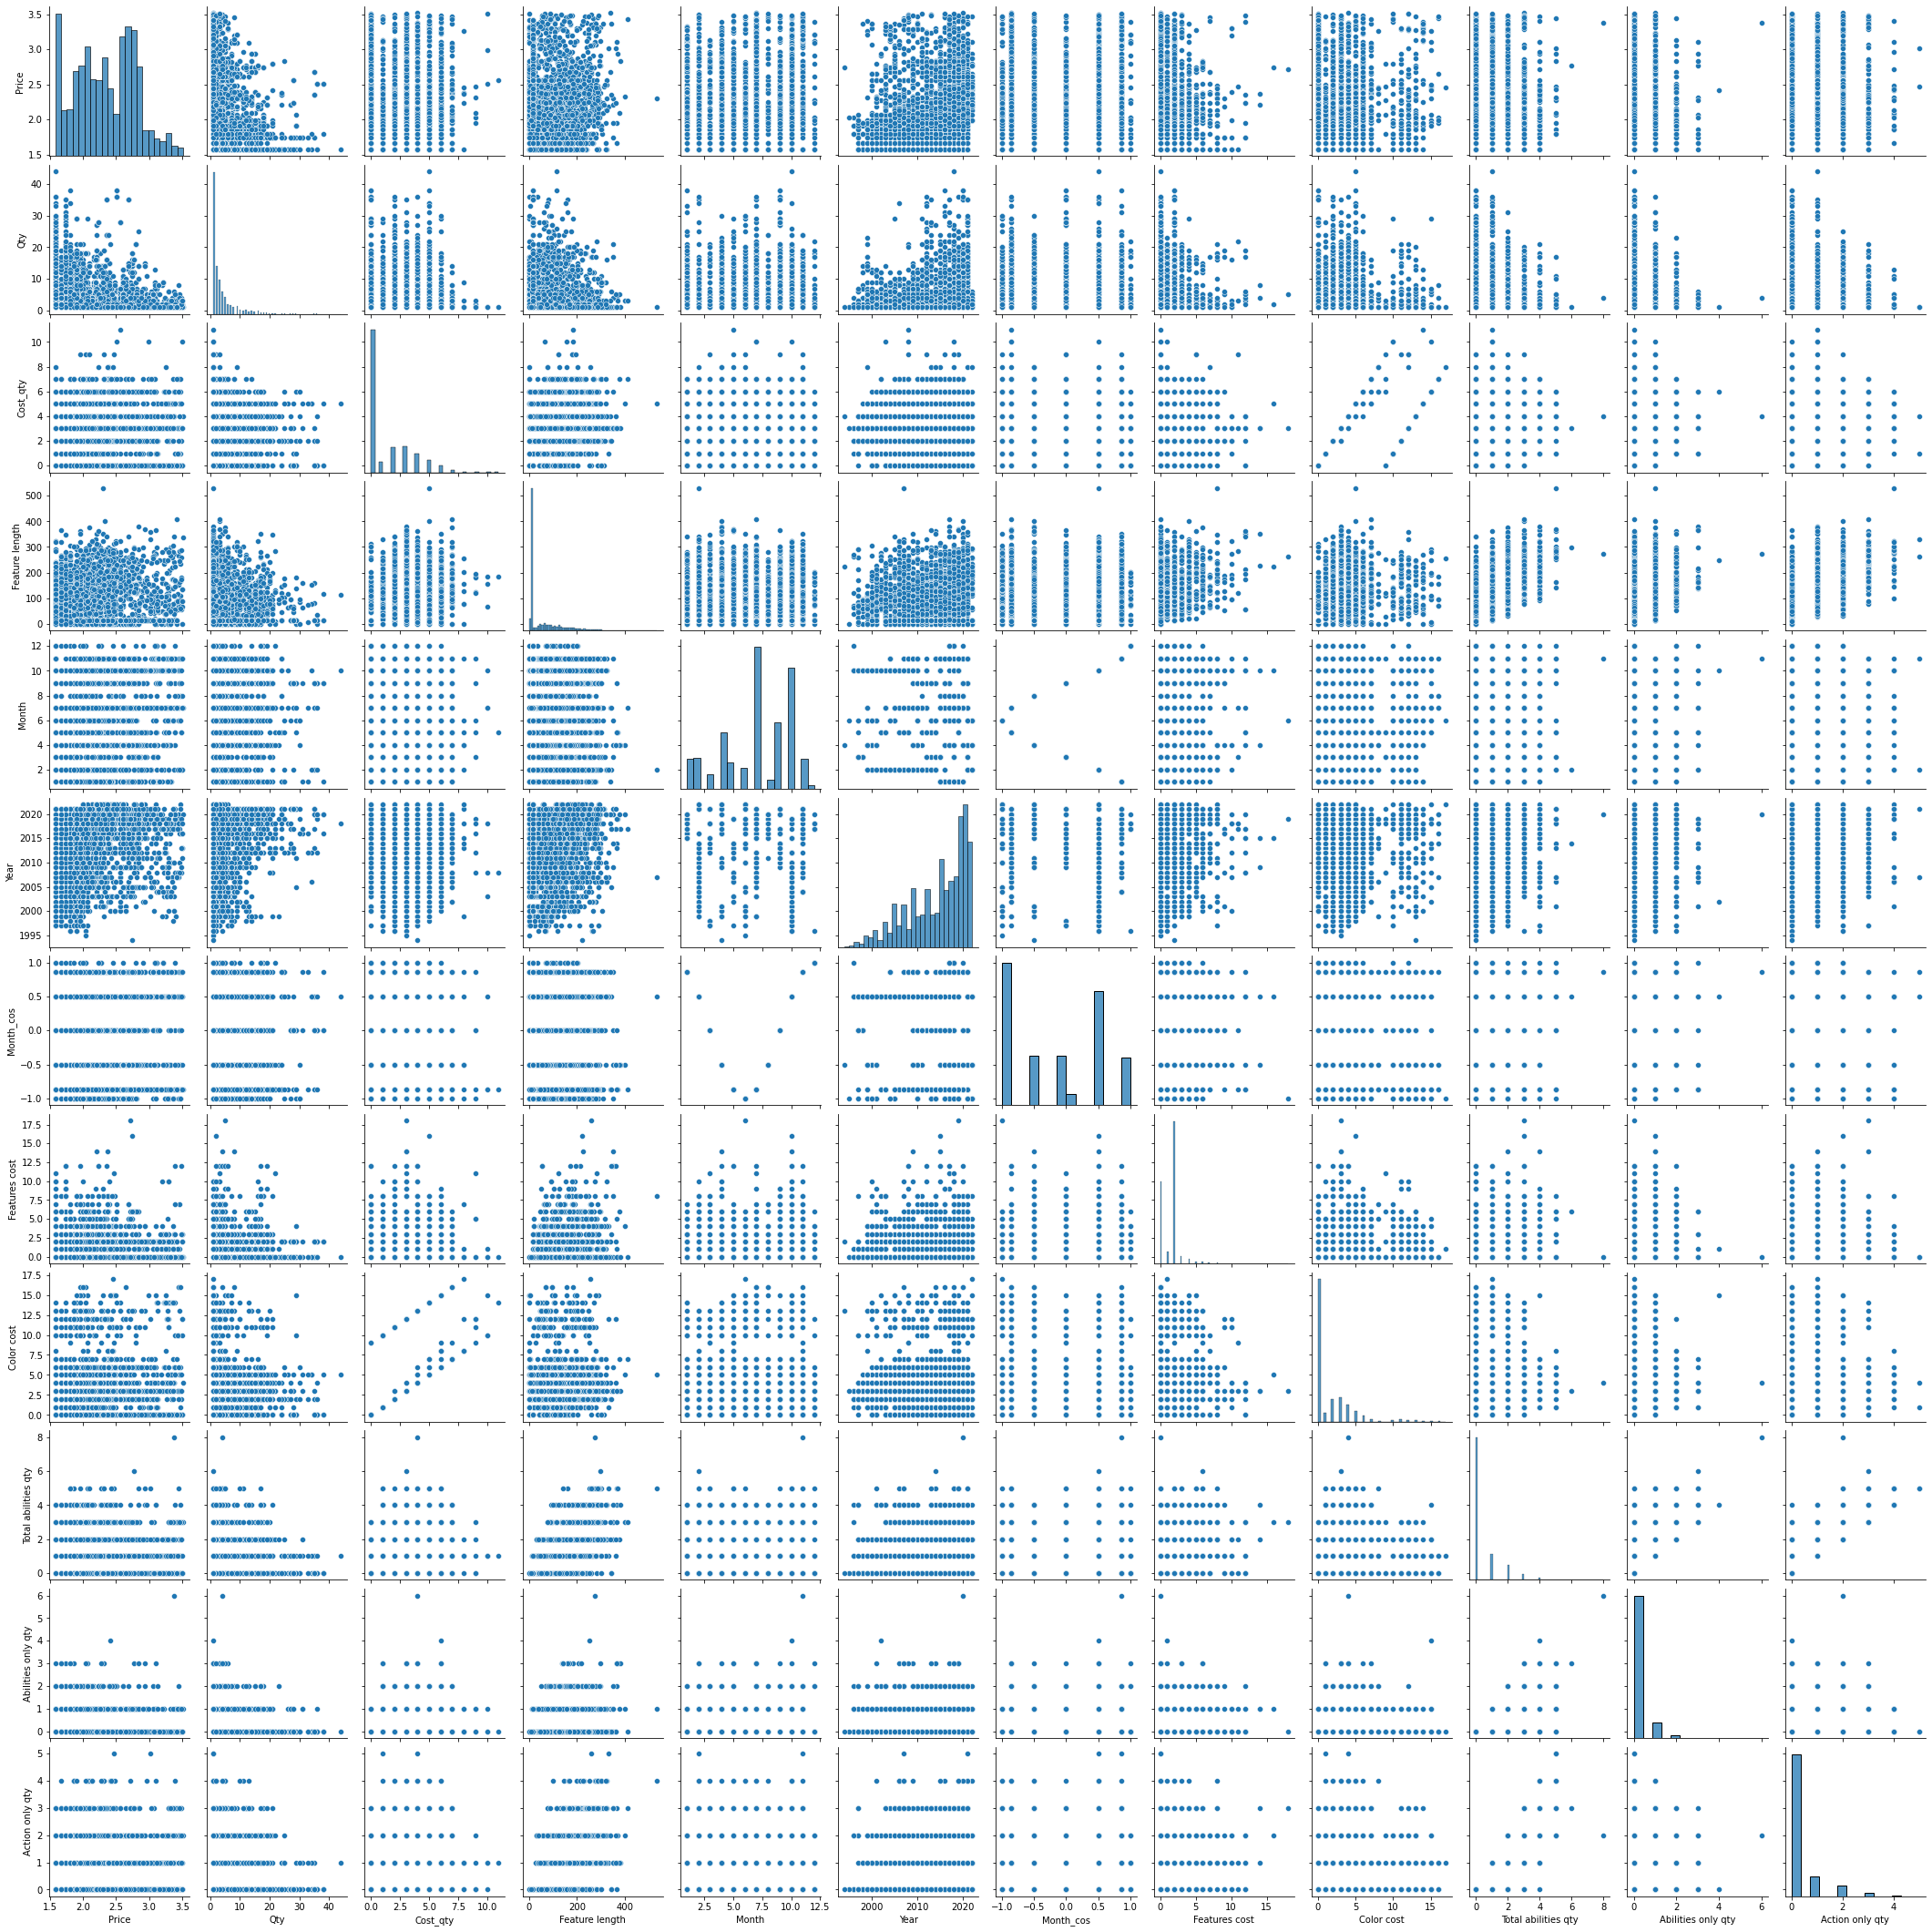

In [17]:
# Долго вычисляется, приходится смотреть по выборке
sns.pairplot(df[nonbin_col].sample(5000))

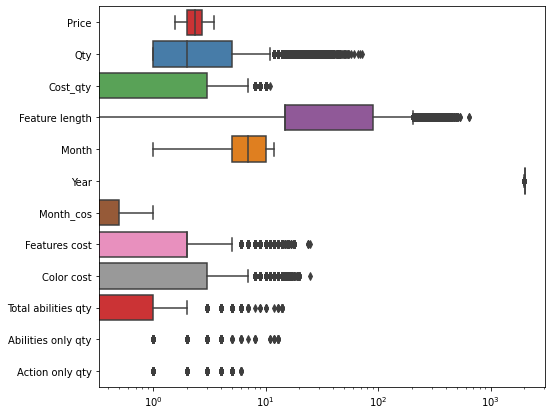

In [18]:
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df[nonbin_col], orient="h", palette="Set1")

# Feature engineering

In [19]:
# Находим общее кол-во карт в продаже по имени
total_qty_dict = df.groupby('Name').sum()['Qty'].to_dict()
df['Qty total'] = df['Name'].map(total_qty_dict)
# nonbin_col.append('Qty_total')

In [20]:
# Пустые значения
missed = {}
for col in df.columns:
    if df[col].isnull().any():
        missed.update({col: [round(df[col].isnull().sum()/len(df)*100,2), df[col].dtype]})
sorted(missed.items(), key = lambda x: x[1], reverse=True)

[('Main feature', [79.83, dtype('O')]),
 ('Colors_features', [33.64, dtype('O')]),
 ('Illustrator', [1.0, dtype('O')])]

In [21]:
for cols in missed.keys():
    df[cols].fillna('None', inplace = True)

Генерируем признаки

In [22]:
def create_aggregations(col:str, num:int) -> pd.Series:
    '''
    Укрупняем числовые данные по медианам
    '''
    
    p_0 = np.percentile(df[col],0)
    p_n = np.percentile(df[col],num)
    print(col, p_0, p_n)
    mark = df[col].apply(lambda x: 'Minimal' if x == p_0 else ('Lower' if x <= p_n else 'Higher'))
    return mark

In [23]:
df['Cards in set'] = df.groupby('Set')['Name'].transform(lambda x:  x.nunique())

In [24]:
df['Qty total agg'] = create_aggregations('Qty total',25)
df['Cost qty agg'] = create_aggregations('Cost_qty',75)
df['Feature length agg'] = create_aggregations('Feature length',50)
df['Total abilities qty agg'] = create_aggregations('Total abilities qty',90)
df['Abilities only qty agg'] = create_aggregations('Abilities only qty',90)
df['Action only qty agg'] = create_aggregations('Action only qty',90)

Qty total 1.0 34.0
Cost_qty 0.0 3.0
Feature length 0.0 15.0
Total abilities qty 0.0 2.0
Abilities only qty 0.0 1.0
Action only qty 0.0 1.0


In [25]:
assert df.isna().values.any() == False

# Preprocessing

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [27]:
Y = df['Price']
X = df.drop('Price', axis = 1)

In [28]:
num_scaler = MinMaxScaler()
cat_enc = OneHotEncoder(drop='first')

In [30]:
num_cols = X.select_dtypes(exclude = 'object').columns

In [32]:
X[num_cols] = pd.DataFrame(data = num_scaler.fit_transform(X[num_cols]), columns=num_cols)

# Modelling

In [33]:
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=777)

In [35]:
cat_idx = X_train.columns.get_indexer(X_train.select_dtypes('object').columns)
parameters = {'depth'         : [4, 5, 6, 7, 8],
              'learning_rate' : np.linspace(0.01,0.07,10),
              'iterations'    : [300, 500, 1000, 1250, 1500]}

In [36]:
model = CatBoostRegressor(loss_function = 'RMSE', cat_features=cat_idx, eval_metric = 'RMSE')
kf = KFold(n_splits=5, random_state=777, shuffle=True)
grid = RandomizedSearchCV(estimator = model, param_distributions = parameters, cv = kf, n_jobs=-1)

In [37]:
grid.fit(X_train,Y_train)

0:	learn: 0.4397231	total: 467ms	remaining: 7m 46s
1:	learn: 0.4264164	total: 798ms	remaining: 6m 37s
2:	learn: 0.4142224	total: 1.14s	remaining: 6m 18s
3:	learn: 0.4022845	total: 1.48s	remaining: 6m 9s
4:	learn: 0.3910982	total: 1.8s	remaining: 5m 59s
5:	learn: 0.3802705	total: 2.09s	remaining: 5m 46s
6:	learn: 0.3699155	total: 2.4s	remaining: 5m 41s
7:	learn: 0.3602355	total: 2.73s	remaining: 5m 38s
8:	learn: 0.3511996	total: 3.01s	remaining: 5m 31s
9:	learn: 0.3425815	total: 3.28s	remaining: 5m 24s
10:	learn: 0.3346155	total: 3.6s	remaining: 5m 23s
11:	learn: 0.3271167	total: 3.94s	remaining: 5m 24s
12:	learn: 0.3197184	total: 4.22s	remaining: 5m 20s
13:	learn: 0.3129536	total: 4.55s	remaining: 5m 20s
14:	learn: 0.3068680	total: 4.92s	remaining: 5m 23s
15:	learn: 0.3005048	total: 5.22s	remaining: 5m 20s
16:	learn: 0.2949319	total: 5.53s	remaining: 5m 19s
17:	learn: 0.2894373	total: 5.86s	remaining: 5m 19s
18:	learn: 0.2844524	total: 6.2s	remaining: 5m 20s
19:	learn: 0.2796919	total:

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=777, shuffle=True),
                   estimator=<catboost.core.CatBoostRegressor object at 0x000002453E2A7E50>,
                   n_jobs=-1,
                   param_distributions={'depth': [4, 5, 6, 7, 8],
                                        'iterations': [300, 500, 1000, 1250,
                                                       1500],
                                        'learning_rate': array([0.01      , 0.01666667, 0.02333333, 0.03      , 0.03666667,
       0.04333333, 0.05      , 0.05666667, 0.06333333, 0.07      ])})

In [38]:
Y_pred = grid.predict(X_test)

In [ ]:
len(Y_pred)

In [44]:
print(mean_absolute_percentage_error(Y_train, Y_pred),
    mean_squared_error(Y_train, Y_pred, squared = False))

ValueError: Found input variables with inconsistent numbers of samples: [117684, 50437]